In [317]:
import numpy as np
from datetime import  datetime

import matplotlib.dates as mdates

import pandas as pd

import pylab as plb
import matplotlib.pyplot as plt

In [318]:
# ------------ Ввод ------------ #
set_ticker_base = "%5EGSPC"
set_ticker_company = "YNDX.ME"
set_start_date = "2015-01-01"
set_end_date = "2021-12-31"
set_interval = "1mo"                  # 1d или 1wk или 1mo

In [319]:
# ------------ Перевод дат в формат для Yahoo ------------ #
corrected_start_date = str(int(datetime.strptime(set_start_date,"%Y-%m-%d").timestamp()))
corrected_end_date = str(int(datetime.strptime(set_end_date,"%Y-%m-%d").timestamp()))

In [320]:
# ------------ Загрузка статистики ------------ #
part1 = "https://query1.finance.yahoo.com/v7/finance/download/"
#part2 = set_ticker
part3 = "?period1="
part4 = corrected_start_date
part5 = "&period2="
part6 = corrected_end_date
part7 = "&interval="
part8 = set_interval
part9 = "&events=history&includeAdjustedClose=true"

url_base = part1 + set_ticker_base + part3 + part4 + part5 + part6 + part7 + part8 + part9
url_company = part1 + set_ticker_company + part3 + part4 + part5 + part6 + part7 + part8 + part9

In [321]:
BASE = pd.read_csv(url_base,
               sep=',', 
               error_bad_lines=False,
               decimal='.',
               parse_dates=['Date'],
               encoding='gbk', 
               skiprows=0)
quart_BASE = BASE.loc[((BASE['Date'].dt.month == 1) | (BASE['Date'].dt.month == 4) | (BASE['Date'].dt.month == 7) | (BASE['Date'].dt.month == 10))]
one_BASE = pd.Series(quart_BASE["Adj Close"])
one_BASE = np.array(one_BASE).tolist()

In [322]:
COMPANY = pd.read_csv(url_company,
               sep=',', 
               error_bad_lines=False,
               decimal='.',
               parse_dates=['Date'],
               encoding='gbk', 
               skiprows=0)
quart_COMPANY = COMPANY.loc[((COMPANY['Date'].dt.month == 1) | (COMPANY['Date'].dt.month == 4) | (COMPANY['Date'].dt.month == 7) | (COMPANY['Date'].dt.month == 10))]
one_COMPANY = pd.Series(quart_COMPANY["Adj Close"])
one_COMPANY = np.array(one_COMPANY).tolist()

In [323]:
# ------------ Расчет динамики базового индекса и компании ------------ #
dyn_BASE = []
for i in range(len(one_BASE)):
    if i >= len(one_BASE)-1:
        continue
    aa = one_BASE[i+1] - one_BASE[i]
    dyn_BASE.append(aa)
    aa = []

dyn_COMPANY = []
for i in range(len(one_COMPANY)):
    if i >= len(one_COMPANY)-1:
        continue
    aa = one_COMPANY[i+1] - one_COMPANY[i]
    dyn_COMPANY.append(aa)
    aa = []

In [324]:
# ------------ Разница между показателями динамики ------------ #
DYN = []
for i in range(len(dyn_COMPANY)):
    aa = dyn_COMPANY[i] - dyn_BASE[i]
    DYN.append(aa)
    aa = []

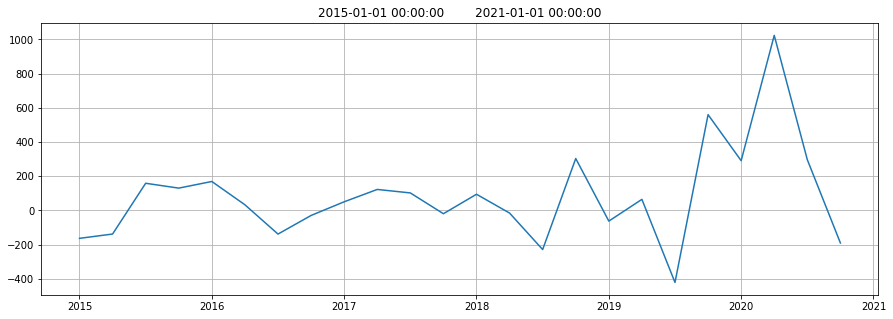

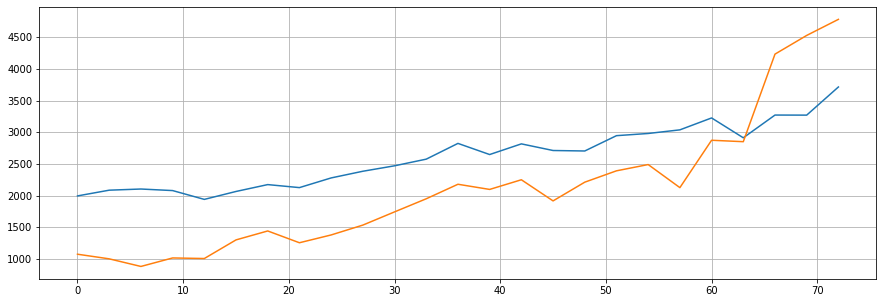

In [325]:
# ------------ График ------------ #
x = DYN

ax = (np.arange(0, len(quart_BASE), 4)).tolist()
ax_x = (np.arange(2015, 2015+len(quart_BASE)/4, 1)).tolist()
for i in range(len(ax_x)):
    ax_x[i] = str(int(ax_x[i]))

plt.figure(figsize=(15,5))
plt.grid()
plt.xticks(ax, ax_x)
plt.plot(x)
plt.title(str(min(quart_BASE["Date"]))+"        "+str(max(quart_BASE["Date"])))
plt.show()

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(quart_BASE["Adj Close"])
plt.plot(quart_COMPANY["Adj Close"])
plt.show()